In [ ]:
#Q.1. Discuss the scenarios where multithreading is preferable to multiprocessing and scenarios where multiprocessing is a better choice.
#Ans :Multithreading is ideal for tasks that are I/O-bound or require frequent access to shared data, as threads can efficiently communicate
#and synchronise access to shared resources. Multiprocessing: Best suited for CPU-intensive tasks that can be easily
#parallelised without frequent inter-process communication.

#1. Conceptual Foundation
#Multithreading: This approach allows a single process to contain multiple threads with the same memory space.
#is akin to having several workers in a single workspace, where they can easily communicate but might interfere with each other's tools.
#Multiprocessing: In contrast, multiprocessing involves multiple processes, each with its own memory space, like separate workspaces
#for each worker, minimising interference and complicating communication.

#2. Memory and Resource Management
#Multithreading: Threads share resources such as memory, making it efficient but necessitating meticulous management to avoid conflicts.
#It is a delicate balance, ensuring threads can work together without stepping on each other's toes.
#Multiprocessing: Each process has its own set of resources, simplifying resource management at the cost of higher resource consumption.
#This isolation can be likened to individual offices, reducing conflict but requiring more space.

#3. Performance Nuances
#Multithreading: The shared memory of threads can lead to faster data access and exchange, boosting performance, especially in I/O-bound tasks.
#However, CPU-bound tasks might not benefit much due to the Global Interpreter Lock (GIL) in Python, which limits
#the execution of bytecode to one thread at a time.
#Multiprocessing: By running processes in parallel, multiprocessing can significantly enhance performance for CPU-bound tasks,
#as each process can run on a separate processor or core, circumventing the GIL in Python.

#4. Scalability and Overheads
#Multithreading: While multithreading can be more lightweight regarding memory usage, it faces scalability issues due to the overheads
#associated with managing many threads, especially in context switching and synchronisation.
#Multiprocessing: Multiprocessing scales well with adding more processors or cores, making it suitable for high-performance computing tasks.
#However, the overhead of starting and managing separate processes can be significant.

#5. Reliability and Isolation
#Multithreading: The shared memory model of multithreading can lead to inadvertent side effects if threads inadvertently modify shared data.
#This necessitates robust synchronisation mechanisms to ensure data integrity.
#Multiprocessing: Multiprocessing's process isolation inherently protects against such issues, making it a more reliable choice for
#tasks that require high stability and data integrity.

#6. Complexity of Implementation
#Multithreading: Implementing multithreading requires careful consideration of data synchronisation and locking mechanisms to avoid deadlocks
#and race conditions, which can complicate the development process.
#Multiprocessing: While multiprocessing may simplify concerns related to data integrity, it introduces complexity in terms of inter-process
#communication (IPC) and coordination, which can be challenging to implement efficiently.

#7. Suitability for Different Task Types
#Multithreading is ideal for tasks that are I/O-bound or require frequent access to shared data, as threads can efficiently communicate and
#synchronise access to shared resources.
#Multiprocessing: Best suited for CPU-intensive tasks that can be easily parallelised without frequent inter-process communication.

#8. Context Switching
#Multithreading: The cost of context switching between threads is generally lower than between processes, leading to better performance in
#scenarios requiring frequent task switching.
#Multiprocessing: Modern operating systems and hardware can mitigate the higher cost of context switching between processes, but it remains
#a consideration when designing systems for optimal performance.

#9. Development and Debugging
#Multithreading: Debugging multithreaded applications can be more challenging due to the non-deterministic nature of thread scheduling
#and execution. Tools and techniques specific to concurrency debugging are often required.
#Multiprocessing: Debugging multiprocessing applications involves understanding process interactions and data flow between processes,
#which can also introduce complexity, especially when dealing to inter-process communication and synchronisation issues.

In [ ]:
#Q.2. Describe what a process pool is and how it helps in managing multiple processes efficiently.
#Ans :The pool allows you to do multiple jobs per process, which may make it easier to parallelize your program. If you have a million tasks
#to execute in parallel, you can create a Pool with a number of processes as many as CPU cores and then pass the list of the million tasks to
#the pool. Map. The pool will distribute those tasks to the worker processes(typically the same number as available cores), collect the return
#values as a list, and pass it to the parent process. Launching separate million processes would be less practical (probably breaking your OS).

#Python-Pool
#Pool Process
#On the other hand, if you have a small number of tasks to execute in parallel and only need each task done once, it may be perfectly
#reasonable to use a separate multiprocessing. Process for each task rather than setting up a Pool.

#We used both Pool and Process classes to evaluate excel expressions. Following are our observations about the pool and process class:
#Multiprocessing is a great way to improve performance. We came across Python Multiprocessing when we had the task of evaluating the millions of
#Excel expressions using Python code.

#In such a scenario, evaluating the expressions serially becomes imprudent and time-consuming. So, we decided to use Python Multiprocessing.

#Generally, in multiprocessing, you execute your task using a process or thread. To get a better advantage of multiprocessing,
#we decided to use thread. However, while doing research,
#we learned that GIL Lock disables the multi-threading functionality in Python. Further digging, we learned that Python provides two
#classes for multiprocessing, such as Process and Pool.

#In the following sections, I have briefly overviewed our experience using pool and process classes. And the performance comparison
#using both types. I have also detailed the performance comparison, which will help you choose the method for your multiprocessing task.

In [ ]:
#Q.3. Explain what multiprocessing is and why it is used in Python programs.
#Ans :multiprocessing is a package that supports spawning processes using an API similar to the threading module.
#The multiprocessing package offers both local and remote concurrency, effectively side-stepping the Global Interpreter Lock by using
#subprocesses instead of threads.
#The multiprocessing module also introduces APIs which do not have analogs in the threading module. A prime example of this is the Pool
#object which offers a convenient means of parallelizing the execution of a function across multiple input values, distributing the input
#data across processes (data parallelism). The following example demonstrates the common practice of defining such functions in a module
#so that child processes can successfully import that module. This basic example of data parallelism using Pool,

from multiprocessing import Pool

def f(x):
    return x*x

if __name__ == '__main__':
    with Pool(5) as p:
        print(p.map(f, [1, 2, 3]))
will print to standard output

[1, 4, 9]

#In multiprocessing, processes are spawned by creating a Process object and then calling its start() method.
#Process follows the API of threading.Thread. A trivial example of a multiprocess program is

from multiprocessing import Process

def f(name):
    print('hello', name)

if __name__ == '__main__':
    p = Process(target=f, args=('bob',))
    p.start()
    p.join()
#To show the individual process IDs involved, here is an expanded example:

from multiprocessing import Process
import os

def info(title):
    print(title)
    print('module name:', __name__)
    print('parent process:', os.getppid())
    print('process id:', os.getpid())

def f(name):
    info('function f')
    print('hello', name)

if __name__ == '__main__':
    info('main line')
    p = Process(target=f, args=('bob',))
    p.start()
    p.join()

In [ ]:
#Q.4. Write a Python program using multithreading where one thread adds numbers to a list, and another thread removes numbers from the list. Implement a mechanism to avoid race conditions using threading.Lock.
#Ans :I'm dealing with a threaded python program. One thread is iterating (by calling iterate) over a list.
#Another thread might (very seldom) try to remove an element from the same list using remove_element:
my_list = [ large number of elements ]
def iterate():
   for item in my_list:
       yield item

def remove_element(x):
   my_list.remove(x)
   #When I'm iterating, I'm setting a flag that iteration is in progress. If the removal thread notices that, it doesn't immediately
   #remove the element, but adds it to a to_be_removed list for later removal.

#Once the iteration is done in the iterating thread, it checks whether there are elements in to_be_removed and removes them.

my_list = [ large number of elements ]
to_be_removed = []
iterating = False
lock = Threading.Lock()
def iterate():
   with lock:
      iterating = True
   try:
      for item in my_list:
          yield item
  finally:
      with lock:
         iterating = False
         while to_be_removed:
             my_list.remove(to_be_removed.pop())

def remove_element(x):
   with lock:
      if iterating:
          to_be_removed.append(x)
      else:
          my_list.remove(x)
#In this example, we use os.getpid() function to get the ID of the current process. We use threading.main_thread() function to get the
#main thread object. In normal conditions, the main thread is the thread from which the Python interpreter was started. name attribute
#of the thread object is used to get the name of the thread. Then we use the threading.current_thread() function to get the current thread object.

#Consider the Python program given below in which we print the thread name and corresponding process for each task.

#This code demonstrates how to use Python’s threading module to run two tasks concurrently. The main program initiates two threads,
#t1 and t2 , each responsible for executing a specific task. The threads run in parallel, and the code provides information about the
#process ID and thread names. The os module is used to access the process ID, and the ‘ threading' module is used to manage threads and their
#execution.


import threading
import os

def task1():
    print("Task 1 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 1: {}".format(os.getpid()))

def task2():
    print("Task 2 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 2: {}".format(os.getpid()))

if __name__ == "__main__":

    print("ID of process running main program: {}".format(os.getpid()))

    print("Main thread name: {}".format(threading.current_thread().name))

    t1 = threading.Thread(target=task1, name='t1')
    t2 = threading.Thread(target=task2, name='t2')

    t1.start()
    t2.start()

    t1.join()
    t2.join()

Output
ID of process running main program: 19
Main thread name: MainThread
Task 1 assigned to thread: t1
ID of process running task 1: 19
Task 2 assigned to thread: t2
ID of process running task 2: 19

Output:
ID of process running main program: 1141
Main thread name: MainThread
Task 1 assigned to thread: t1
ID of process running task 1: 1141
Task 2 assigned to thread: t2
ID of process running task 2: 1141
The diagram given below clears the above concept:

multithreading-python-5
Multithreading

 #So, this was a brief introduction to multithreading in Python.
 #The next article in this series covers  synchronization between multiple threads   Multithreading in Python | Set 2 (Synchronization)

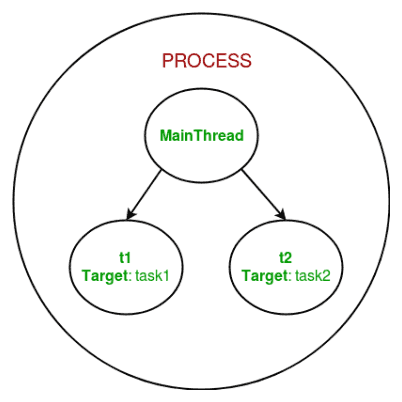

In [ ]:
#Q.5. Describe the methods and tools available in Python for safely sharing data between threads and processes.
#Ans :To do this, create a Queue instance that is shared by the threads. Threads then use put() or get() operations to add or remove
#items from the queue as shown in the code given below.
#Queue instances already have all of the required locking, so they can be safely shared by as many threads as per requirement.
#from queue import Queue
#from threading import Thread

# A thread that produces data
def producer(out_q):
    while True:
        # Produce some data
        ...
        out_q.put(data)

# A thread that consumes data
def consumer(in_q):
    while True:
        # Get some data
        data = in_q.get()
        # Process the data
        ...

# Create the shared queue and launch both threads
q = Queue()
t1 = Thread(target = consumer, args =(q, ))
t2 = Thread(target = producer, args =(q, ))
t1.start()
t2.start()
#Queue instances already have all of the required locking, so they can be safely shared by as many threads as per requirement.
#When using queues, it can be somewhat tricky to coordinate the shutdown of the producer and consumer.

#A common solution to this problem is to rely on a special sentinel value, which when placed in the queue, causes consumers
#to terminate as shown in the code below:

In [ ]:
#Q.6. Discuss why it’s crucial to handle exceptions in concurrent programs and the techniques available for doing so.
#Ans :Exception handling is a crucial part of writing solid Python code.
#It helps developers prepare for and deal with potential errors that might pop up during program execution,
#ultimately improving the reliability and user experience of the program.
#When it comes to exception handling in Python, there are four key keywords to keep in mind: try, except, else, and finally.

#try **:**This is where you place the code that might trigger an exception. Python runs this code and keeps an eye out for any exceptions.
#except: If an exception occurs in the try block, Python will jump to the except block to handle the error or take the necessary steps for recovery.
#else: This block runs if no exceptions were raised in the try block. It’s handy for executing code that should only run if the try block is successful.
#finally: Code within the finally block runs no matter what, whether an exception was raised or not. It’s often used
#for clean-up tasks like closing files or network connections.
try:
    # attempt to do something that may raise an exception
except ValueError as e:
    # handle exception if raised
else:
    # exception wasn't raised, so do something else
finally:
    # always do this, regasrdless if an exception was raised or not

#Dealing with multiple exceptions
#Python lets you catch multiple exceptions in a single except block using a tuple of exception types or by having multiple except
#blocks for different error handling scenarios.

try:
    # code that may raise multiple exceptions.
except (TypeError, ValueError) as e:
    # handle multiple specific exceptions
except ValueError as e:
    # handle any other exceptions


In [ ]:
#Q.7. Create a program that uses a thread pool to calculate the factorial of numbers from 1 to 10 concurrently. Use concurrent.futures.ThreadPoolExecutor to manage the threads.
#Ans :Threading allows parallelism of code and Python language has two ways to achieve its 1st is via multiprocessing module and 2nd is
#via multithreading module. Multithreading is well suited to speed up I/O bound tasks like making a web request, or database operations,
#or reading/writing to a file. In contrast to this CPU intensive tasks like mathematical computational tasks are benefited the most using
#multiprocessing. This happens due to GIL (Global Interpreter Lock).

#From Python 3.2 onwards a new class called ThreadPoolExecutor was introduced in Python in concurrent.futures module to efficiently manage
#and create threads. But wait if python already had a threading module inbuilt then why a new module was introduced. Let me answer this first.

#Syntax: concurrent.futures.ThreadPoolExecutor(max_workers=None, thread_name_prefix=”, initializer=None, initargs=())

#Parameters:

#max_workers: It is a number of Threads aka size of pool. From 3.8 onwards default value is min(32, os.cpu_count() + 4).
#Out of these 5 threads are preserved for I/O bound task.
#thread_name_prefix : thread_name_prefix was added from python 3.6 onwards to give names to thread for easier debugging purpose.
#initializer: initializer takes a callable which is invoked on start of each worker thread.
#initargs: It’s a tuple of arguments passed to initializer.
#ThreadPoolExecutor Methods :
#ThreadPoolExecutor class exposes three methods to execute threads asynchronously. A detailed explanation is given below.

#submit(fn, *args, **kwargs): It runs a callable or a method and returns a Future object representing the execution state of the method.
#map(fn, *iterables, timeout = None, chunksize = 1) :
#It maps the method and iterables together immediately and will raise an exception concurrent. futures.TimeoutError if it fails to do so
 #within the timeout limit.
#If the iterables are very large, then having a chunk-size larger than 1 can improve performance when using ProcessPoolExecutor but with
#ThreadPoolExecutor it has no such advantage, ie it can be left to its default value.
#shutdown(wait = True, *, cancel_futures = False):
#It signals the executor to free up all resources when the futures are done executing.
#It must be called after executor.submit() and executor.map() method else it would throw RuntimeError.
#wait=True makes the method not to return until execution of all threads is done and resources are freed up.
#cancel_futures=True then the executor will cancel all the future threads that are yet to start.
#Example 1:
# below code demonstrates the use of ThreadPoolExecutor, notice unlike with the threading module we do not have to explicitly
#call using a loop, keeping a track of thread using a list or wait for threads using join for synchronization, or releasing the
#resources after the threads are finished everything is taken under the hood by the constructor itself making the code compact and bug-free.

from concurrent.futures import ThreadPoolExecutor
from time import sleep

values = [3,4,5,6]

def cube(x):
    print(f'Cube of {x}:{x*x*x}')


if __name__ == '__main__':
    result =[]
    with ThreadPoolExecutor(max_workers=5) as exe:
        exe.submit(cube,2)

        # Maps the method 'cube' with a list of values.
        result = exe.map(cube,values)

    for r in result:
      print(r)
Output:

Output:
Cube of 2:8
Cube of 3:27
Cube of 4:64
Cube of 5:125
Cube of 6:216

In [ ]:
#Q.8. Create a Python program that uses multiprocessing.Pool to compute the square of numbers from 1 to 10 in parallel. Measure the time taken to perform this computation using a pool of different sizes (e.g., 2, 4, 8 processes).
#Ans:Introduction to parallel processing
#For parallelism, it is important to divide the problem into sub-units that do not depend on other sub-units (or less dependent).
#A problem where the sub-units are totally independent of other sub-units is called embarrassingly parallel.
#For example, An element-wise operation on an array. In this case, the operation needs to aware of the particular element it is handling at the moment.
#In another scenario, a problem which is divided into sub-units have to share some data to perform operations. These results in the
#performance issue because of the communication cost.
#There are two main ways to handle parallel programs:

#Shared Memory
#In shared memory, the sub-units can communicate with each other through the same memory space. The advantage is that you don’t need to
#handle the communication explicitly because this approach is sufficient to read or write from the shared memory. But the problem arises
#when multiple process access and change the same memory location at the same time. This conflict can be avoided using synchronization techniques.

#Distributed memory
#In distributed memory, each process is totally separated and has its own memory space. In this scenario, communication is
#handled explicitly between the processes. Since the communication happens through a network interface, it is costlier compared to shared memory.

#Threads are one of the ways to achieve parallelism with shared memory. These are the independent sub-tasks that originate from a
#process and share memory. Due to Global Interpreter Lock (GIL) , threads can’t be used to increase performance in Python. GIL is a
#mechanism in which Python interpreter design allow only one Python instruction to run at a time. GIL limitation can be completely avoided
#by using processes instead of thread. Using processes have few disadvantages such as less efficient inter-process communication than shared
#memory, but it is more flexible and explicit.

#Multiprocessing for parallel processing
#Using the standard multiprocessing module, we can efficiently parallelize simple tasks by creating child processes. This module provides
#an easy-to-use interface and contains a set of utilities to handle task submission and synchronization.

#Process and Pool Class
#Process

#By subclassing multiprocessing.process, you can create a process that runs independently. By extending the __init__ method you
#can initialize resource and by implementing Process.run() method you can write the code for the subprocess. In the below code,
#we see how to create a process which prints the assigned id:

import multiprocessing as mp

res1 = set()
res2 = set()
nums = [1, 2, 3, 4, 5]

def squared(x):
    res1.add(x ** x)

def cubed(x):
    res2.add(x * x * x)

def main():
    pool = mp.Pool(mp.cpu_count())

    pool.map(squared, nums)
    print(res1, res2)

    pool.map(cubed, nums)
    print(res1, res2)

if __name__ == "__main__":
    main()
Result:

set() set()
set() set()

import multiprocessing as mp

def squared(x):
    return x * x

def cubed(x):
    return x * x * x

def main():
    nums = [1, 2, 3, 4, 5]

    pool = mp.Pool(mp.cpu_count())

    res1 = set(pool.map(squared, nums))
    res2 = set(pool.map(cubed, nums))
    print(res1)
    print(res2)

if __name__ == "__main__":
    main()
Prints:

{1, 4, 9, 16, 25}
{64, 1, 8, 27, 125}